In [253]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://moneycrashers-sparkchargemedia.netdna-ssl.com/wp-content/uploads/2019/04/personal-loans-pros-cons-1068x713.jpg")

# Lending Analysis

Kita akan mencoba menganalisa dan memprediksi data pinjaman dan bagaimana orang tersebut akan bayar atau tidak dikemudian harinya. Dataset kita ambil dari [Google Drive - Loan Prediction](https://drive.google.com/file/d/1K6OMDYu6yRdUO65Le1NbRBTNFPsbAX6s/view?usp=sharing). Berikut ini penjelasan mengenai fitur-fitur yang terdapat pada dataset kita, yaitu:

* **`credit_policy`**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* **`purpose`**: The purpose of the loan such as: credit_card, debt_consolidation, etc.
* **`int_rate`**: The interest rate of the loan (proportion).
* **`installment`**: The monthly installments owed by the borrower if the loan is funded.
* **`log_annual_inc`**: The natural log of the annual income of the borrower.
* **`dti`**: The debt-to-income ratio of the borrower.
* **`fico`**: The FICO credit score of the borrower.
* **`days_with_cr_line`**: The number of days the borrower has had a credit line.
* **`revol_bal`**: The borrower's revolving balance.
* **`revol_util`**: The borrower's revolving line utilization rate.
* **`inq_last_6mths`**: The borrower's number of inquiries by creditors in the last 6 months.
* **`delinq_2yrs`**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* **`pub_rec`**: The borrower's number of derogatory public records.
* **`not_fully_paid`**: indicates whether the loan was not paid back in full (the borrower either defaulted or the borrower was deemed unlikely to pay it back).

## Import Library and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import and Read Data

In [3]:
loans = pd.read_csv('loan_data.csv')

In [14]:
print(f"\033[1m\033[94mTipe Data Fitur:\n{11 * '-'}")
print(f"\033[30m{loans.dtypes}\n")

Tipe Data Fitur:
-----------
credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object



In [30]:
loans.shape

(9578, 14)

In [18]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [17]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Missing Values and Duplicate Row Checking

In [13]:
print(f"\033[1m\033[94mJumlah Null pada Fitur:\n{35 * '-'}")
print(f"\033[30m{loans.isnull().sum()}")

Jumlah Null pada Fitur:
-----------------------------------
credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64


In [19]:
# Select duplicate rows except last occurrence based on all columns
duplicate = loans[loans.duplicated(keep='last')]
 
duplicate

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


In [22]:
print("Duplicated rows yang terdeteksi adalah :")
print(duplicate)

Duplicated rows yang terdeteksi adalah :
Empty DataFrame
Columns: [credit.policy, purpose, int.rate, installment, log.annual.inc, dti, fico, days.with.cr.line, revol.bal, revol.util, inq.last.6mths, delinq.2yrs, pub.rec, not.fully.paid]
Index: []


# Explore the Variable Target 

In [108]:
pos = loans[loans["not.fully.paid"] == 1].shape[0]
neg = loans[loans["not.fully.paid"] == 0].shape[0]
print(f"Sampel Target Positif = {pos}")
print(f"Sampel Target Negatif = {neg}")
print(f"Proporsi Sampel Not Fully Paid  = {(pos / 9578 ) * 100:.2f}%")
print(f"Proporsi Sampel Fully Paid      = {(neg / 9578) * 100:.2f}%")
print(f"Proporsi Sampel Data Total      = {(pos / neg) * 100:.2f}%")

Sampel Target Positif = 1533
Sampel Target Negatif = 8045
Proporsi Sampel Not Fully Paid  = 16.01%
Proporsi Sampel Fully Paid      = 83.99%
Proporsi Sampel Data Total      = 19.06%


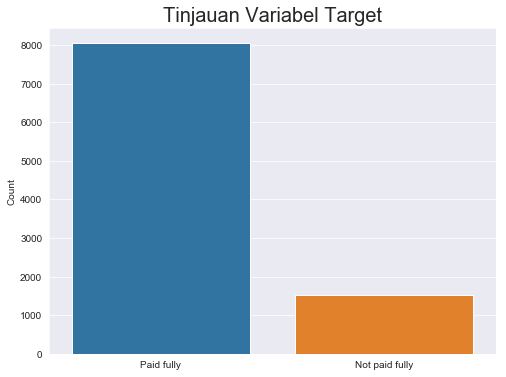

In [32]:
plt.figure(figsize=(8, 6))
sns.countplot(loans["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Tinjauan Variabel Target", y=1, fontdict={"fontsize": 20});

# `Installment` Feature

### `Installment` Variance and Quantile

In [243]:
Q1 = loans['installment'].quantile(0.25)
Q3 = round(loans['installment'].quantile(0.75),2)

print("Nilai ragam (variansi) dari fitur installment adalah",round(loans['installment'].var(),2))
print("Nilai Q1 dari fitur installment adalah",loans['installment'].quantile(0.25))
print("Nilai Q3 dari fitur installment adalah",round(loans['installment'].quantile(0.75),2))
print("==================================================")
print("Nilai simpangan kuartil installment adalah", Q3-Q1 )

Nilai ragam (variansi) dari fitur installment adalah 42878.52
Nilai Q1 dari fitur installment adalah 163.77
Nilai Q3 dari fitur installment adalah 432.76
Nilai simpangan kuartil installment adalah 268.99


### `Purpose` Feature from `Installment` POV

In [106]:
#Berapa nilai installment tertinggi untuk masing-masing tujuan pinjaman (masing-masing kategori pada variable ‘purpose’)
loans.loc[loans.groupby('purpose')['installment'].idxmax()].sort_values('installment', ascending=False).head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
9281,0,debt_consolidation,0.2086,940.14,12.569941,18.64,682,4589.958333,18406,50.8,9,0,0,0
9288,0,small_business,0.1982,926.83,11.608236,16.20,737,12209.958330,144217,12.0,0,1,0,1
9524,0,credit_card,0.1947,922.42,11.561716,19.81,662,3380.041667,20622,76.4,5,0,0,0
7687,1,all_other,0.1904,916.95,12.345835,14.43,667,5970.041667,39476,78.3,0,0,0,0
8070,0,home_improvement,0.1786,902.06,12.765688,17.64,657,4230.041667,44827,80.4,14,0,0,1


In [100]:
loans[['installment', 'purpose']].groupby('purpose').max().sort_values('installment', ascending=False)

,installment
purpose,
debt_consolidation,940.14
small_business,926.83
credit_card,922.42
all_other,916.95
home_improvement,902.06
major_purchase,898.55
educational,861.88


# `Purpose` Feature

* Variable ‘purpose’ menunjukkan tujuan pengajuan pinjaman.
* Ada berapa kategori pada variable tersebut?
* Visualisasikan frekuensi pinjaman berdasarkan tujuannya, diurutkan dari frekuensi tertinggi.

In [144]:
print(f"\033[1m\033[94mKategori pada fitur purpose\n{35 * '-'}")
print(f"\033[30m{loans['purpose'].value_counts()}")
print("\nPada fitur purpose terdapat {} kategori" .format(len(loans['purpose'].value_counts())))

Kategori pada fitur purpose
-----------------------------------
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

Pada fitur purpose terdapat 7 kategori


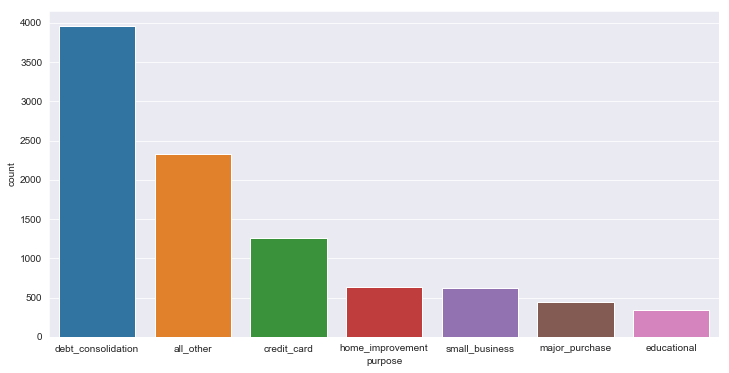

In [145]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'purpose', data = loans, order = loans['purpose'].value_counts().index)

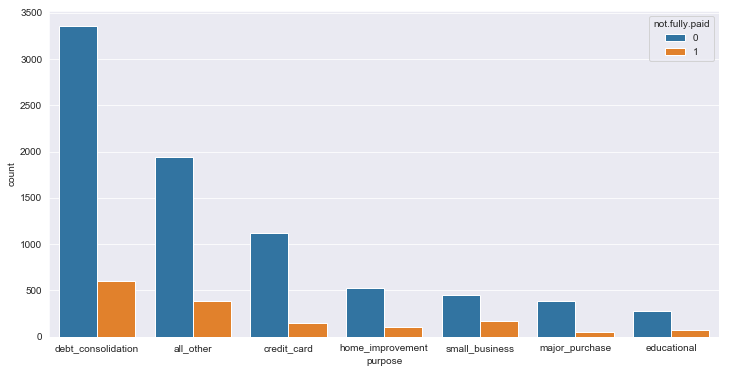

In [146]:
plt.subplots(figsize = (12,6))
sns.countplot(x = 'purpose', hue = 'not.fully.paid', data = loans, order = loans['purpose'].value_counts().index)

# `FICO` Variable as Predictor

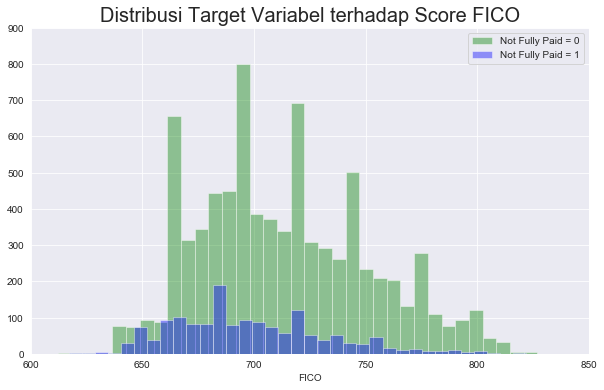

In [149]:
plt.subplots(figsize = (10,6))
sns.distplot(loans[loans['not.fully.paid'] == 0]['fico'], bins = 35, kde = False, color = 'green', label = 'Not Fully Paid = 0')
sns.distplot(loans[loans['not.fully.paid'] == 1]['fico'], bins = 35, kde = False, color = 'blue', label = 'Not Fully Paid = 1')
plt.xlim(600,850)
plt.ylim(0,900)
plt.legend(loc = 1)
plt.xlabel('FICO')
plt.title("Distribusi Target Variabel terhadap Score FICO", y=1, fontdict={"fontsize": 20});

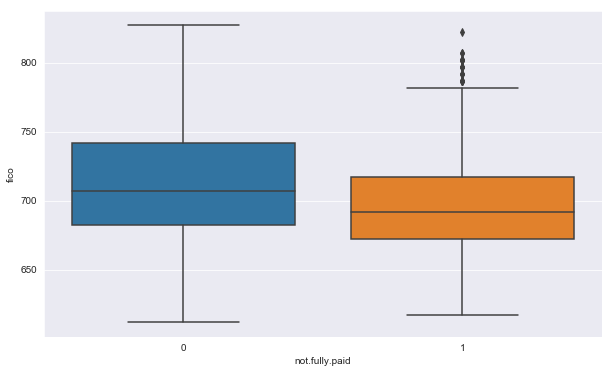

In [151]:
plt.subplots(figsize = (10,6))
fic = sns.boxplot(x="not.fully.paid", y="fico", data=loans)

###  Insight
Menurut saya apa yang terlihat pada distribusi plot skor FICO terhadap target **`not.fully.paid`** tidak terlalu berarti dan menjadi tolok ukur sebagai prediktor potensial. Mengapa? Karena terlihat bahwa dari hasil plot yang dihasilkan memberikan pemahaman baru bahwa setiap skor 0 maupun 1 dari fitur **`not.fully.paid`** memiliki nilai skor FICO yang merata tersebar, sehingga skor FICO tidak dapat mempengaruhi apakah orang akan membayar penuh atau tidak setelah mengajukan pinjaman.

# `Purpose` Variable as Predictor

In [161]:
purp = pd.crosstab(loans["purpose"], loans["not.fully.paid"], normalize = "columns")
purp

not.fully.paid,0,1
purpose,,
all_other,0.241641,0.252446
credit_card,0.138720,0.095238
debt_consolidation,0.416905,0.393346
educational,0.034058,0.045010
home_improvement,0.064885,0.069798
major_purchase,0.048229,0.031963
small_business,0.055562,0.112198


In [162]:
stacked = purp.stack().reset_index().rename(columns={0:'value'})

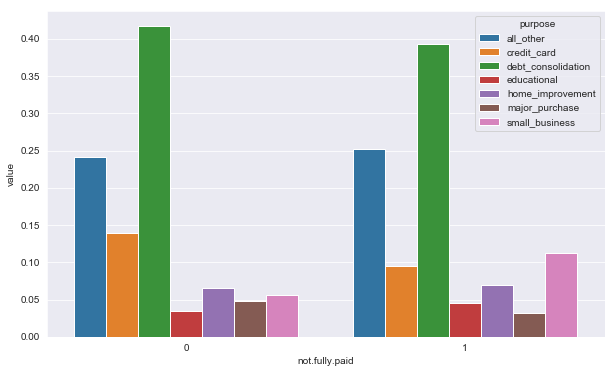

In [174]:
plt.subplots(figsize = (10,6))
sns.barplot(x=stacked["not.fully.paid"], y=stacked.value, hue=stacked.purpose)

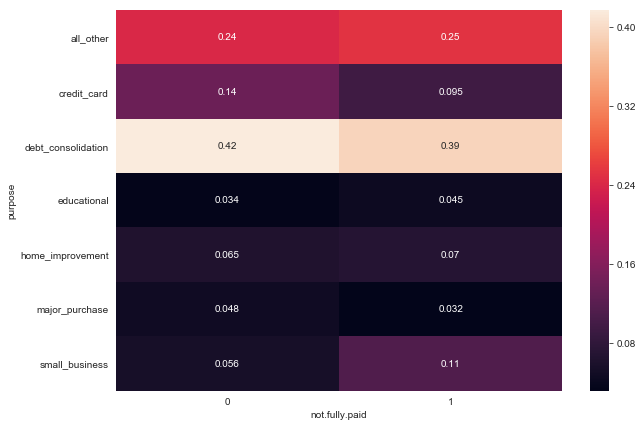

In [176]:
plt.subplots(figsize = (10,7))
sns.heatmap(purp, annot=True)

### Insight

Menurut saya apa yang terlihat pada plot fitur **`purpose`** terhadap target **`not.fully.paid`** dapat menjadi tolok ukur untuk mengetahui peran fitur **`purpose`** sebagai prediktor potensial. Mengapa? Karena terlihat bahwa dari hasil plot yang dihasilkan memberikan pemahaman baru bahwa terdapat beberapa kategori pada **`purpose`** yang mempengaruhi perbedaan hasil **`not.fully.paid`**, yaitu kategori `credit_card` dan `small_business`. Kategori ini dapat menjadi prediktor pada target namun dikarenakan sedikitnya pengaruh (tidak terlalu besar) maka dapat dikatakan temuan ini **tidak menjadikan mereka sebagai prediktor yang potensial**.

# `int.rate` Variable

In [187]:
rank = loans[['int.rate', 'purpose']].groupby('purpose').mean().sort_values('int.rate', ascending=False)
rank

,int.rate
purpose,
small_business,0.138087
debt_consolidation,0.126595
educational,0.119907
credit_card,0.119738
home_improvement,0.117507
all_other,0.116771
major_purchase,0.114171


In [200]:
print(f"\033[1m\033[94mnilai rata-rata int.rate untuk CC credit_card adalah]", round((rank['int.rate'].credit_card),3))

nilai rata-rata int.rate untuk CC credit_card adalah] 0.12


# `Educational` Purpose Installment

In [204]:
edu = len(loans[(loans['installment']>200) & (loans['purpose']=='educational')])
print('Jumlah pinjamana dimana installment > 200 dan tujuan untuk pendidikan ada sebanyak {} pinjaman '.format(edu))

Jumlah pinjamana dimana installment > 200 dan tujuan untuk pendidikan ada sebanyak 137 pinjaman 


# `Credit Card` Filtering

In [207]:
loans3 = loans[loans['purpose']=='credit_card']
loans3.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
17,1,credit_card,0.0894,476.58,11.608236,7.07,797,6510.958333,7586,52.7,1,0,0,0
22,1,credit_card,0.1355,339.60,11.512925,7.94,662,1939.958333,21162,57.7,0,0,0,0


# Modelling Preparation

Sebelum memulai, ketahui terlebih dahulu bahwa kolom `purpose` bertindak sebagai fitur **categorical**

Itu artinya, kita harus *transfom* (mengubah) DataFrame kita dengan menggunakan ***dummy variables*** agar dapat dimengerti oleh program kita kedepannya. Bisa kita gunakan **pd.get_dummies**

In [208]:
categorical = ['purpose']

In [209]:
final_data = pd.get_dummies(loans, columns = categorical, drop_first = True)

In [210]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# Test and Train Split

In [245]:
from sklearn.model_selection import train_test_split

X = final_data.drop('not.fully.paid', axis = 1)
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3 , random_state= 101)

# Decision Tree Model Training

In [246]:
from sklearn.tree import DecisionTreeClassifier

In [247]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Decision Tree Evaluation

In [248]:
from sklearn.metrics import confusion_matrix, classification_report

In [249]:
y_prediksi = dtree.predict(X_test)

In [250]:
print(classification_report(y_test, y_prediksi))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2431
           1       0.18      0.21      0.19       443

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.51      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [251]:
confuse = confusion_matrix(y_test, y_prediksi)
print(f"\033[1m\033[94mConfusion Matrix - DT]\n{35 * '-'}")
print(f"\033[30m{confuse}")

Confusion Matrix - DT]
-----------------------------------
[[2007  424]
 [ 351   92]]


In [252]:
total=sum(sum(confuse))
accuracy=(confuse[0,0]+confuse[1,1])/total
print(f"\033[1m\033[94mAccuracy    : ", round(accuracy*100,2))

sensitivity = confuse[0,0]/(confuse[0,0]+confuse[0,1])
print('Sensitivity : ', round(sensitivity*100,2))

specificity = confuse[1,1]/(confuse[1,0]+confuse[1,1])
print('Specificity : ', round(specificity*100,2))

Accuracy    :  73.03
Sensitivity :  82.56
Specificity :  20.77
